- ## Lifecycle of a Machine Learning Project
    - Understanding the Problem Statement
    - Data Collection
    - Data Checks
    - Exploratory Data Analysis
    - Model Trainings
    - Choose Best Model

### 1) Problem Statement
- This problem understands students performance in various test scores based on features like,ethnicity,gender,parental education level,preparation courses,lunch type

### 2) Data Collection
- data source : kaggle

- Dataset Information

    - gender:sex of the student(male,female)
    - race/ethnicity:of student(5 races)
    - parental level of education:parents highest qualification
    - lunch:type of lunch before test
    - test preparation course:if the course for test prepartion was completed by the student or not
    - maths score:marks in maths
    - reading score:marks in reading skill
    - writing score:marks in writing skill

### Importing necessary libraries to perform data checks: numpy, matplotlib, pandas, warnings, seaborn

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# warnings.filterwarnings("default")


### Importing the csv data as pandas.DataFrame

In [3]:
df=pd.read_csv(r"D:\e2e_mlproject_1\notebook\data\stdnt_perf.csv")

### viewing the first 5 rows of the dataframe

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## View rows and columns

In [5]:
df.shape

(1000, 8)

## 3) Data Checks to Perform
- Check Missing Values
- Check Duplicates
- Check Datatype
- Check Number of Unique Values for each column
- Check statistics of dataset
- Check various categories present in the dataset of categorical features

## 3.1 Check Missing Values

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## No missing values

## 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

## No duplicate rows found

## 3.3 Check Datatype

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 Check unique values for each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## 3.5 Check numerical and categorical features for the dataset

In [10]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [11]:
num_features=[f for f in df.columns if df[f].dtype!="O"]
cat_features=[f for f in df.columns if df[f].dtype=="O"]

In [12]:
print(f"Numerical features are: {num_features}")
print(f"Categorical features are: {cat_features}")

Numerical features are: ['math_score', 'reading_score', 'writing_score']
Categorical features are: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## 3.6 Check statistics of numerical features

In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insights
##### The mean of every score is close,  math:66 reading:69 writing:68
##### In fact the variability is also close, math:15 reading:14.6 writing:15

### There is difference in minimum scores:
maths: 0
reading: 17
writing: 10

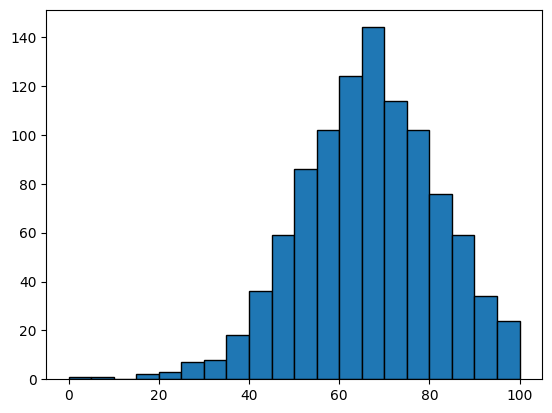

In [14]:
plt.hist(df["math_score"],bins=20,edgecolor="black")
plt.show()

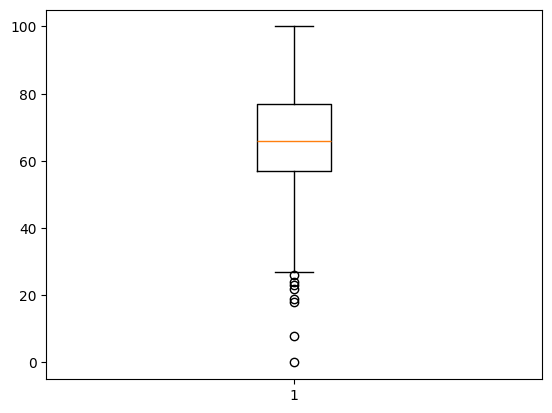

In [15]:
plt.boxplot(x=df["math_score"])
plt.show()

(array([  1.,   3.,   4.,   3.,   7.,  15.,  33.,  31.,  63.,  77.,  84.,
         98.,  94., 143.,  95.,  73.,  76.,  44.,  27.,  29.]),
 array([ 17.  ,  21.15,  25.3 ,  29.45,  33.6 ,  37.75,  41.9 ,  46.05,
         50.2 ,  54.35,  58.5 ,  62.65,  66.8 ,  70.95,  75.1 ,  79.25,
         83.4 ,  87.55,  91.7 ,  95.85, 100.  ]),
 <BarContainer object of 20 artists>)

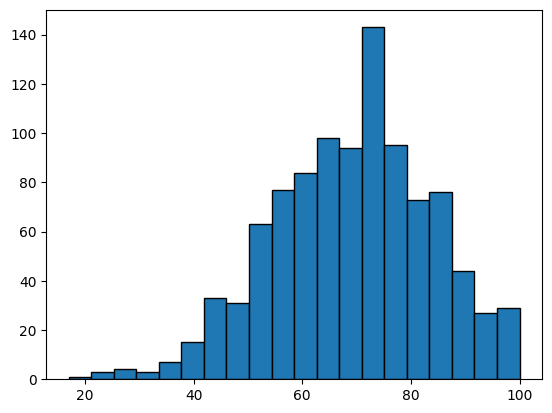

In [16]:
plt.hist(df["reading_score"],bins=20,edgecolor="black")
# plt.show()

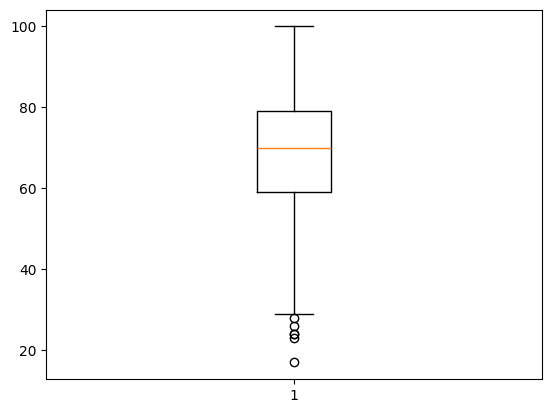

In [17]:
plt.boxplot(x=df["reading_score"])
plt.show()

(array([  1.,   1.,   3.,   3.,   4.,  10.,  21.,  34.,  47.,  79.,  78.,
         83., 124.,  99., 134.,  91.,  79.,  41.,  42.,  26.]),
 array([ 10. ,  14.5,  19. ,  23.5,  28. ,  32.5,  37. ,  41.5,  46. ,
         50.5,  55. ,  59.5,  64. ,  68.5,  73. ,  77.5,  82. ,  86.5,
         91. ,  95.5, 100. ]),
 <BarContainer object of 20 artists>)

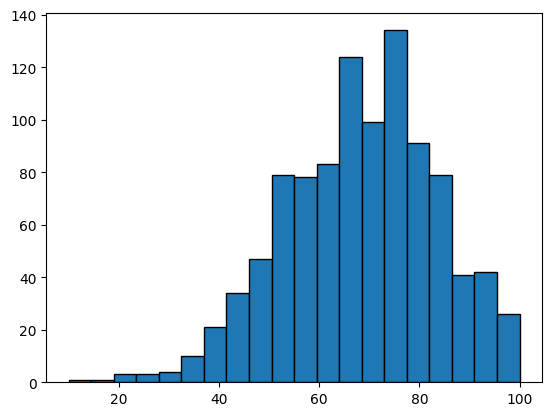

In [18]:
plt.hist(df["writing_score"],bins=20,edgecolor="black")
# plt.show()

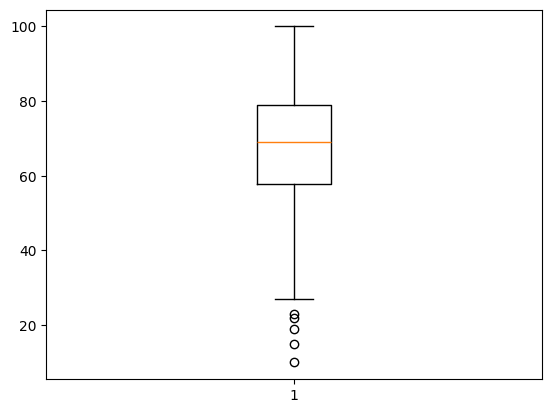

In [19]:
plt.boxplot(x=df["writing_score"])
plt.show()

In [20]:
df_distinction=df[(df["reading_score"]>=75)&(df["writing_score"]>=75)&(df["math_score"]>=75)]
df_distinction

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
6,female,group B,some college,standard,completed,88,95,92
16,male,group C,high school,standard,none,88,89,86
34,male,group E,some college,standard,none,97,87,82
...,...,...,...,...,...,...,...,...
983,female,group A,some college,standard,completed,78,87,91
987,male,group E,some high school,standard,completed,81,75,76
990,male,group E,high school,free/reduced,completed,86,81,75
995,female,group E,master's degree,standard,completed,88,99,95


In [21]:
len(df_distinction)/len(df)*100

21.099999999999998

In [22]:
len(df_distinction[df_distinction["test_preparation_course"]=="none"])
len(df_distinction[df_distinction["test_preparation_course"]=="completed"])

113

More than 21% of students have received distinction in all the three tests

In [23]:
def bar_graph_with_label(xs,heights,bar_labels,percentage=False):
    fig,ax=plt.subplots()
    bars=ax.bar(x=xs,height=heights)

    sum=0
    if percentage:
        for height in heights:
            sum+=height

    for bar,bar_label in zip(bars,bar_labels):
        height=bar.get_height()
        ax.text(
            (bar.get_x()+bar.get_width())/2,
            height,
            f"{bar_label/sum*100 if sum>0 else bar_label}",
            ha="center",va="bottom"
        )
    plt.show()


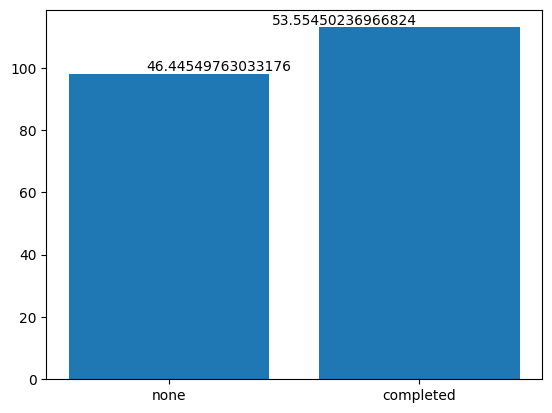

In [24]:
bar_graph_with_label(df_distinction["test_preparation_course"].unique(),[len(df_distinction[df_distinction["test_preparation_course"]=="none"]),len(df_distinction[df_distinction["test_preparation_course"]=="completed"])],[len(df_distinction[df_distinction["test_preparation_course"]=="none"]),len(df_distinction[df_distinction["test_preparation_course"]=="completed"])],percentage=True)

## INSIGHT
#### Completion of the test preparation course is not necessary for distinction.

In [25]:
df_full=df[(df["reading_score"]>=95)&(df["writing_score"]>=95)&(df["math_score"]>=95)]
df_full

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
114,female,group E,bachelor's degree,standard,completed,99,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
458,female,group E,bachelor's degree,standard,none,100,100,100
625,male,group D,some college,standard,completed,100,97,99
712,female,group D,some college,standard,none,98,100,99
717,female,group C,associate's degree,standard,completed,96,96,99
855,female,group B,bachelor's degree,standard,none,97,97,96
916,male,group E,bachelor's degree,standard,completed,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100


In [26]:
print(f"{len(df[df['reading_score']==100])}")
print(f"{len(df[df['writing_score']==100])}")
print(f"{len(df[df['math_score']==100])}")

17
14
7


In [27]:
print(f"There are {len(cat_features)} categorical features in the dataset\n\n")

for f in cat_features:
    print(f"Categories for {f}: {list(df[f].unique())}")


There are 5 categorical features in the dataset


Categories for gender: ['female', 'male']
Categories for race_ethnicity: ['group B', 'group C', 'group A', 'group D', 'group E']
Categories for parental_level_of_education: ["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school']
Categories for lunch: ['standard', 'free/reduced']
Categories for test_preparation_course: ['none', 'completed']
